In [1]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
cluster_df = pd.read_pickle('cluster_results/kmeans_7_30m_results.pkl')

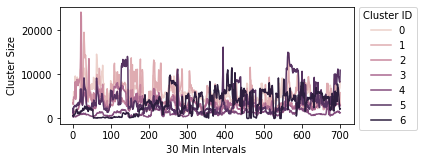

In [3]:
fig,ax = plt.subplots(figsize=(6,3))
df = cluster_df[['cluster_size','label','slice_idx']]
df.columns = ['Cluster Size','Cluster ID','30 Min Intervals']
sns.lineplot(
    data = df,
    y = 'Cluster Size',
    hue='Cluster ID',
    x='30 Min Intervals',
    ax = ax
)

ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0,title='Cluster ID')
fig.tight_layout()
fig.subplots_adjust(bottom=0.4)

fig.savefig('plots/clustering/cluster_size.pdf',bbox_inches='tight')

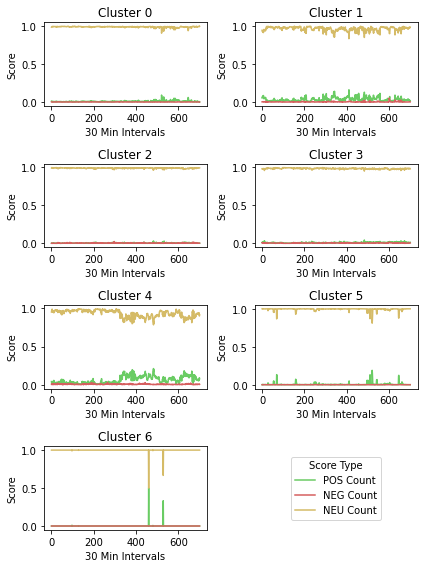

In [4]:
custom_cmap = [sns.color_palette('muted')[2],sns.color_palette('muted')[3],sns.color_palette('muted')[-2]]

fig,axes = plt.subplots(figsize=(6,8),nrows=4,ncols=2)
for (label,subset),ax in zip(cluster_df.groupby('label'),axes.flatten()):
    sent_scores = subset[['pos_count','neg_count','neu_count']].values / subset[['pos_count','neg_count','neu_count']].sum(1).values[:,None]
    df = pd.DataFrame( sent_scores,columns = ['POS Count', 'NEG Count', 'NEU Count'])
    df = df.reset_index().melt(id_vars='index')
    df.columns = ['30 Min Intervals', 'Score Type','Score']
    sns.lineplot(
        data = df,
        x = '30 Min Intervals',
        y = 'Score',
        hue = 'Score Type',
        ax = ax,
        palette = custom_cmap,
        legend=False
    ).set(
        title=f'Cluster {label}'
    )

axes.flatten()[-1].axis('off')
axes.flatten()[-1].plot(0, 0,color = custom_cmap[0], label = 'POS Count')
axes.flatten()[-1].plot(0, 0,color = custom_cmap[1], label = 'NEG Count')
axes.flatten()[-1].plot(0, 0,color = custom_cmap[2], label = 'NEU Count')
axes.flatten()[-1].legend(title='Score Type',loc='center')

plt.tight_layout()
fig.savefig('plots/clustering/sentiment_count.pdf')

/home/kangi/data/blockchain-interoperability/blockchain-social-media/blockchain-sns-env/lib64/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


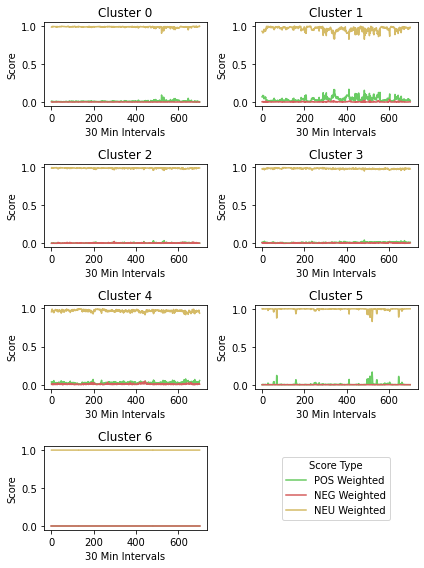

In [5]:
custom_cmap = [sns.color_palette('muted')[2],sns.color_palette('muted')[3],sns.color_palette('muted')[-2]]

fig,axes = plt.subplots(figsize=(6,8),nrows=4,ncols=2)
for label,subset in cluster_df.groupby('label'):
    sent_scores = subset[['pos_weight','neg_weight','neu_weight']].values / subset[['pos_weight','neg_weight','neu_weight']].sum(1).values[:,None]
    df = pd.DataFrame( sent_scores,columns = ['POS Weighted', 'NEG Weighted', 'NEU Weighted'])
    df = df.reset_index().melt(id_vars='index')
    df.columns = ['30 Min Intervals', 'Score Type','Score']
    p = sns.lineplot(
        data = df,
        x = '30 Min Intervals',
        y = 'Score',
        hue = 'Score Type',
        ax = axes.flatten()[label],
        palette= custom_cmap,
        legend = False
    ).set(
        title=f'Cluster {label}'
    )
    
axes.flatten()[-1].axis('off')
axes.flatten()[-1].plot(0, 0,color = custom_cmap[0], label = 'POS Weighted')
axes.flatten()[-1].plot(0, 0,color = custom_cmap[1], label = 'NEG Weighted')
axes.flatten()[-1].plot(0, 0,color = custom_cmap[2], label = 'NEU Weighted')
axes.flatten()[-1].legend(title='Score Type',loc='center')
fig.tight_layout()
fig.savefig('plots/clustering/sentiment_weight.pdf',bbox_inches='tight')

In [9]:
for l in cluster_df.label.unique():
    all_time_topics = cluster_df[cluster_df.label == l][['topic_by_count','topic_counts']].apply(lambda x: Counter(dict(zip(x[0],x[1]))),axis=1).sum()
    topics,_ = zip(*sorted(all_time_topics.items(),key=lambda x: x[1],reverse=True))
    print(l)
    print(', '.join(topics[:10]))

# cluster_df[cluster_df.label == 0][]

0
$, crypto, binance, token, project, btc, eth, bnb, join, amp
1
airdrop, project, live, $, sea, tokens, token, got, airdrops, round
2
crypto, $, ftx, blockchain, security, twitter, people, bitcoin, hack, money
3
roll, security, bridge, going, nuts, like, amp, moon, bayc, paid
4
security, sea, live, sushi, siiiiiiirrrrrr, yesss, social, national, old, office
5
$, holy, nft, crypto, crap, token, got, join, way, actually
6
pump, signal, happen, wallstreetbets, event, kucoin, announced, group, big, massive


In [7]:


for l in cluster_df.label.unique():
    all_time_topics = cluster_df[cluster_df.label == l][['topic_by_weight','topic_weights']].apply(lambda x: Counter(dict(zip(x[0],x[1]))),axis=1).sum()
    topics,summed_weights = zip(*sorted(all_time_topics.items(),key=lambda x: x[1],reverse=True))
    print(l)
    print(', '.join(topics[:10]))

# cluster_df[cluster_df.label == 0][]

0
$, crypto, binance, token, project, btc, eth, blockchain, bnb, join
1
airdrop, project, $, live, token, got, round, airdrops, sea, 1
2
crypto, $, ftx, blockchain, security, twitter, bitcoin, people, like, hack
3
roll, bridge, security, going, like, nuts, amp, people, let, time
4
security, social, national, sushi, people, sea, live, amp, want, wealth
5
$, nft, holy, crypto, token, got, crap, way, actually, tax
6
pump, signal, happen, wallstreetbets, event, kucoin, announced, big, group, hours


In [10]:
import torch
embeddings = torch.load('cluster_results/kmeans_7_30m_embeddings.pkl')

In [22]:
import numpy as np

X = np.vstack([e['cluster_embs'] for e in embeddings[:7]])
y = np.concatenate([np.array([e['label']]*len(e['cluster_embs'])) for e in embeddings[:7]])

In [30]:
print(all(X[:,0] == 0))
print(all(X[:,1] == 0))
print(all(X[:,2] == 0))
print(all(X[:,3] == 0))
print(all(X[:,4] == 0))
print(all(X[:,5] == 0))
print(all(X[:,6] == 0))

True
False
True
False
False
True
False


In [39]:
import plotly.graph_objects as go  #for 3D plot

## K-means using k = 3
# kmeans = KMeans(n_clusters=3)
# kmeans.fit(X)
# y_kmeans = kmeans.predict(X)

## 3D plot 
Scene = dict(xaxis = dict(title  = 'Feature 1'),yaxis = dict(title  = 'Feature 2'),zaxis = dict(title  = 'Feature 3'))

labels = y
trace = go.Scatter3d(x=X[:, 1], y=X[:, 3], z=X[:, 4], mode='markers',marker=dict(color = labels, size= 5, line=dict(color= 'black',width = 2)))
layout = go.Layout(margin=dict(l=0,r=0),scene = Scene,height = 1200,width = 1200)
data = [trace]
fig = go.Figure(data = data, layout = layout)

config = {
  'toImageButtonOptions': {
    'format': 'png', # one of png, svg, jpeg, webp
    'filename': 'kmeans-scatter',
    'height': 800,
    'width': 800,
    'scale':6 # Multiply title/legend/axis/canvas sizes by this factor
  }
}
fig.show(config=config)

/home/kangi/data/blockchain-interoperability/blockchain-social-media/blockchain-sns-env/lib64/python3.6/site-packages/plotly/graph_objs/_deprecations.py:550: DeprecationWarning:

plotly.graph_objs.XAxis is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.layout.XAxis
  - plotly.graph_objs.layout.scene.XAxis


/home/kangi/data/blockchain-interoperability/blockchain-social-media/blockchain-sns-env/lib64/python3.6/site-packages/plotly/graph_objs/_deprecations.py:578: DeprecationWarning:

plotly.graph_objs.YAxis is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.layout.YAxis
  - plotly.graph_objs.layout.scene.YAxis


/home/kangi/data/blockchain-interoperability/blockchain-social-media/blockchain-sns-env/lib64/python3.6/site-packages/plotly/graph_objs/_deprecations.py:603: DeprecationWarning:

plotly.graph_objs.ZAxis is deprecated.
Please replace it with one of the following more specific type